In [ ]:
import pandas as pd
import numpy as np 
%matplotlib inline
from matplotlib import pyplot

In [ ]:
!apt-get install -q libgeos-3.5.0

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'


In [ ]:
!apt-get install -q libgeos-dev

Reading package lists...
Building dependency tree...
Reading state information...
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 17 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (122 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 146425 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip

     |████████████████████████████████| 133.1MB 51kB/s 
     |████████████████████████████████| 6.5MB 4.5MB/s 
     |████████████████████████████████| 225kB 35.4MB/s 


In [ ]:
!pip install -q pyproj==1.9.6

     |████████████████████████████████| 2.8MB 6.5MB/s 


In [ ]:
# from mpl_toolkits import basemap
# from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import shapely
import shapely.wkt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/2020/DATA Annalytics/Project Velo Lib/bikes.csv')
data.shape

(589527, 13)

Affichage
Apres avoir importer notre data-set,voila dans cette parties on va realiser une analyse afin de comprendre les entites de notre data-set

In [ ]:
data.head(4)

,status,contract_name,name,bonus,bike_stands,number,last_update,available_bike_stands,banking,available_bikes,address,lat,lng
0,CLOSED,Santander,001_JARDINES DE PEREDA,False,40,1,1500531758000,10,True,30,Jardines de Pereda (Aprox. Correos y Castelar),43.461719,-3.8021
1,CLOSED,Santander,001_JARDINES DE PEREDA,False,40,1,1500532021000,10,True,30,Jardines de Pereda (Aprox. Correos y Castelar),43.461719,-3.8021
2,CLOSED,Santander,001_JARDINES DE PEREDA,False,40,1,1500532163000,10,True,30,Jardines de Pereda (Aprox. Correos y Castelar),43.461719,-3.8021
3,CLOSED,Santander,001_JARDINES DE PEREDA,False,40,1,1500532179000,10,True,30,Jardines de Pereda (Aprox. Correos y Castelar),43.461719,-3.8021


**Description data-set**
ici on a afficher les type des attribut de chaque collone afn de savoir comment se comporter avec chacune des variables.
Notre Data-set comport historique de 17 station de parking.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589527 entries, 0 to 589526
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   status                 589527 non-null  object 
 1   contract_name          589527 non-null  object 
 2   name                   589527 non-null  object 
 3   bonus                  589527 non-null  bool   
 4   bike_stands            589527 non-null  int64  
 5   number                 589527 non-null  int64  
 6   last_update            589527 non-null  int64  
 7   available_bike_stands  589527 non-null  int64  
 8   banking                589527 non-null  bool   
 9   available_bikes        589527 non-null  int64  
 10  address                589527 non-null  object 
 11  lat                    589527 non-null  float64
 12  lng                    589527 non-null  float64
dtypes: bool(2), float64(2), int64(5), object(4)
memory usage: 50.6+ MB


In [ ]:
data.describe()

,bike_stands,number,last_update,available_bike_stands,available_bikes,lat,lng
count,589527.000000,589527.000000,5.895270e+05,589527.000000,589527.000000,589527.000000,589527.000000
mean,21.562719,8.732250,1.509179e+12,10.537807,11.019602,43.466157,-3.807325
std,6.700851,4.892697,8.059589e+09,5.594643,5.699320,0.007331,0.026705
min,15.000000,1.000000,1.496095e+12,0.000000,0.000000,43.452813,-3.871391
25%,15.000000,5.000000,1.501393e+12,7.000000,7.000000,43.460726,-3.817978
50%,20.000000,9.000000,1.510963e+12,10.000000,10.000000,43.465323,-3.800586
75%,25.000000,13.000000,1.516484e+12,13.000000,14.000000,43.471805,-3.788653
max,40.000000,17.000000,1.521655e+12,99.000000,42.000000,43.478472,-3.773276


In [ ]:
data[["bike_stands", "available_bike_stands", "available_bikes"]].describe()

,bike_stands,available_bike_stands,available_bikes
count,589527.000000,589527.000000,589527.000000
mean,21.562719,10.537807,11.019602
std,6.700851,5.594643,5.699320
min,15.000000,0.000000,0.000000
25%,15.000000,7.000000,7.000000
50%,20.000000,10.000000,10.000000
75%,25.000000,13.000000,14.000000
max,40.000000,99.000000,42.000000


In [ ]:
data = data[data["bike_stands"] >= (data["available_bike_stands"] + data["available_bikes"])]

In [ ]:
data.describe()

,bike_stands,number,last_update,available_bike_stands,available_bikes,lat,lng
count,582212.000000,582212.000000,5.822120e+05,582212.000000,582212.000000,582212.000000,582212.000000
mean,21.601496,8.705755,1.509297e+12,10.466452,11.034432,43.466196,-3.807389
std,6.675917,4.899438,8.018128e+09,5.366585,5.685799,0.007366,0.026788
min,15.000000,1.000000,1.496095e+12,0.000000,0.000000,43.452813,-3.871391
25%,15.000000,4.000000,1.501546e+12,7.000000,7.000000,43.460726,-3.817978
50%,20.000000,9.000000,1.511064e+12,10.000000,10.000000,43.465323,-3.800586
75%,25.000000,13.000000,1.516548e+12,13.000000,14.000000,43.471805,-3.788653
max,40.000000,17.000000,1.521655e+12,40.000000,40.000000,43.478472,-3.773276


In [ ]:
data.status.value_counts()

OPEN      582196
CLOSED        16
Name: status, dtype: int64

In [ ]:
data.banking.value_counts()

True    582212
Name: banking, dtype: int64

In [ ]:
data.bonus.value_counts()

False    582212
Name: bonus, dtype: int64

In [ ]:
data = data.drop(["bonus", "number", "contract_name", "banking", "address"], axis=1)
data.head(3)

,status,name,bike_stands,last_update,available_bike_stands,available_bikes,lat,lng
0,CLOSED,001_JARDINES DE PEREDA,40,1500531758000,10,30,43.461719,-3.8021
1,CLOSED,001_JARDINES DE PEREDA,40,1500532021000,10,30,43.461719,-3.8021
2,CLOSED,001_JARDINES DE PEREDA,40,1500532163000,10,30,43.461719,-3.8021


In [ ]:
data["bad_stands"] = data["bike_stands"] - (data["available_bike_stands"] + data["available_bikes"])

In [ ]:
data.describe()

,bike_stands,last_update,available_bike_stands,available_bikes,lat,lng,bad_stands
count,582212.000000,5.822120e+05,582212.000000,582212.000000,582212.000000,582212.000000,582212.000000
mean,21.601496,1.509297e+12,10.466452,11.034432,43.466196,-3.807389,0.100611
std,6.675917,8.018128e+09,5.366585,5.685799,0.007366,0.026788,0.589135
min,15.000000,1.496095e+12,0.000000,0.000000,43.452813,-3.871391,0.000000
25%,15.000000,1.501546e+12,7.000000,7.000000,43.460726,-3.817978,0.000000
50%,20.000000,1.511064e+12,10.000000,10.000000,43.465323,-3.800586,0.000000
75%,25.000000,1.516548e+12,13.000000,14.000000,43.471805,-3.788653,0.000000
max,40.000000,1.521655e+12,40.000000,40.000000,43.478472,-3.773276,33.000000


In [ ]:
data["last_update"] = pd.to_datetime(data["last_update"], unit='ms')
data["time"] = data['last_update'].map(lambda x: x.hour)
#data["time"] = data['last_update'].map(lambda x: x.hour)
data.head(10)

,status,name,bike_stands,last_update,available_bike_stands,available_bikes,lat,lng,bad_stands,time
0,CLOSED,001_JARDINES DE PEREDA,40,2017-07-20 06:22:38,10,30,43.461719,-3.8021,0,6.366667
1,CLOSED,001_JARDINES DE PEREDA,40,2017-07-20 06:27:01,10,30,43.461719,-3.8021,0,6.450000
2,CLOSED,001_JARDINES DE PEREDA,40,2017-07-20 06:29:23,10,30,43.461719,-3.8021,0,6.483333
3,CLOSED,001_JARDINES DE PEREDA,40,2017-07-20 06:29:39,10,30,43.461719,-3.8021,0,6.483333
4,CLOSED,001_JARDINES DE PEREDA,40,2017-07-20 06:33:01,10,30,43.461719,-3.8021,0,6.550000
5,CLOSED,001_JARDINES DE PEREDA,40,2017-07-20 06:36:03,10,30,43.461719,-3.8021,0,6.600000
6,CLOSED,001_JARDINES DE PEREDA,40,2017-07-20 06:39:00,10,30,43.461719,-3.8021,0,6.650000
7,CLOSED,001_JARDINES DE PEREDA,40,2017-07-20 06:40:33,10,30,43.461719,-3.8021,0,6.666667
8,CLOSED,001_JARDINES DE PEREDA,40,2017-07-20 06:43:27,10,30,43.461719,-3.8021,0,6.716667
9,CLOSED,001_JARDINES DE PEREDA,40,2017-07-20 06:47:00,10,30,43.461719,-3.8021,0,6.783333


In [ ]:
data.to_csv('out.csv',index=False)

In [ ]:
data["time_cluster"] = pd.cut(data["time"], 24 * 3)
data["time_cluster"] = pd.Categorical(data["time_cluster"]).codes / 3.0


In [ ]:
grouped = data[["time_cluster", "name", "bike_stands", "available_bikes", "bad_stands"]].groupby(["time_cluster", "name"]).mean()

grouped.head(20)

bike_stands  ...  bad_stands
time_cluster name                                       ...            
0.000000     001_JARDINES DE PEREDA               40.0  ...    0.169133
             002_PLAZA DE LAS BRISAS              20.0  ...    0.012346
             003_PARQUE LAS LLAMAS                20.0  ...    0.053388
             004_CORMORÁN                         20.0  ...    0.099567
             005_GLORIETA DE LOS DELFINES         20.0  ...    0.041068
             006_FACULDAD DE CIENCIAS             25.0  ...    0.017544
             007_FACULTAD DE DERECHO              30.0  ...    0.162162
             008_PLAZA DE ITALIA                  15.0  ...    0.083333
             009_AVENIDA DE LA MAGDALENA          15.0  ...    0.142276
             010_PLAZA DE SAN MARTIN              15.0  ...    0.063781
             011_PUERTO CHICO                     25.0  ...    0.102041
             012_CALLE ALTA                       15.0  ...    0.020450
             013_CALLE DE SAN FERNANDO            25.0  ...    0.029821
             014_ATILANO RODRIGUEZ                30.0  ...    0.042945
             015_AV.DE LOS CASTROS 141            15.0  ...    0.101996
             016_SEVERO OCHOA                     20.0  ...    0.278761
             017_RUCANDIAL                        20.0  ...    0.118000
0.333333     001_JARDINES DE PEREDA               40.0  ...    0.174004
             002_PLAZA DE LAS BRISAS              20.0  ...    0.012397
             003_PARQUE LAS LLAMAS                20.0  ...    0.053061

[20 rows x 3 columns]

In [ ]:
pivot = pd.pivot_table(grouped.reset_index(), index="time_cluster", columns="name")

Histograme de chaque station
Histograme des nombre de velo disponible pour chaque station de notre data-set

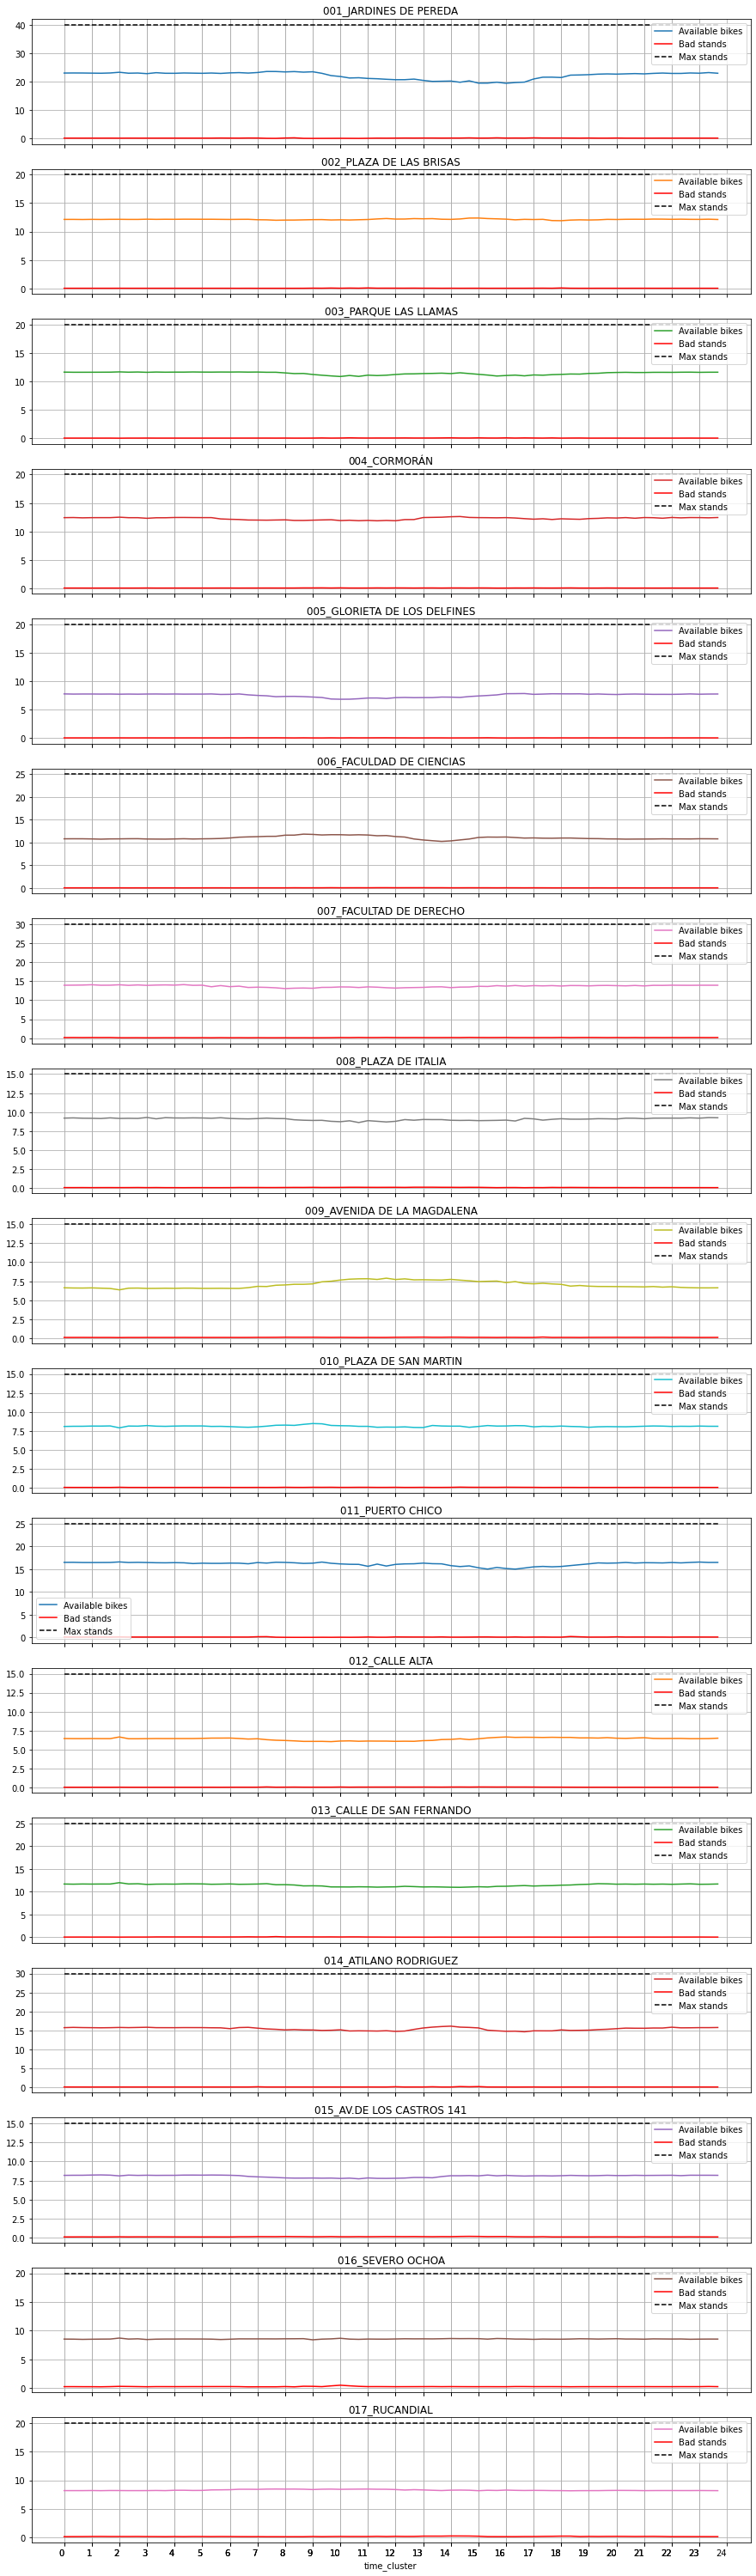

In [ ]:
titles = list(pivot.available_bikes.columns.values)

# Round the times to that we do not show all 20m slots.
indexes = np.round(pivot.index)

ax = pivot.available_bikes.plot(subplots=True,grid=True,rot=0,xticks=np.round(pivot.index),figsize=(15,60),title=titles,)
ax = pivot.bad_stands.plot(subplots=True,ax=ax,grid=True,style='r',   )
ax = pivot.bike_stands.plot(subplots=True,ax=ax,grid=True,style='k--',   )

for a in ax:
    a.legend(["Available bikes", "Bad stands", "Max stands"])

In [ ]:
bike_lanes_df = pd.read_csv("/content/drive/MyDrive/2020/DATA Annalytics/Project Velo Lib/bike_lanes.csv")
bike_lanes_df["wkt_wsg84"] = bike_lanes_df["wkt_wsg84"].apply(shapely.wkt.loads)

bike_lanes_df.head(3)

,dc:identifier,dc:modified,ayto:WKT,ayto:Estado,uri,wkt_wsg84
0,3490,2017-11-16T00:00:02.207Z,"LINESTRING (436605.589 4812767.388, 436607.503...",EJECUTADO,http://datos.santander.es/api/datos/carril_bic...,LINESTRING (-3.784934930131774 43.463232709696...
1,3475,2017-11-16T00:00:02.206Z,"LINESTRING (436433.488 4812698.184, 436435.378...",EJECUTADO,http://datos.santander.es/api/datos/carril_bic...,LINESTRING (-3.787054128393073 43.462595014045...
2,3483,2017-11-16T00:00:02.206Z,"LINESTRING (436574.143 4812768.238, 436575.443...",EJECUTADO,http://datos.santander.es/api/datos/carril_bic...,LINESTRING (-3.785323722626032 43.463237693619...


In [ ]:
bike_lanes = shapely.geometry.MultiLineString(list(bike_lanes_df["wkt_wsg84"]))

Pour finir la partir visualisation ci-dessous projection des station dans le map en se bason sur leur cordonnees GPS.

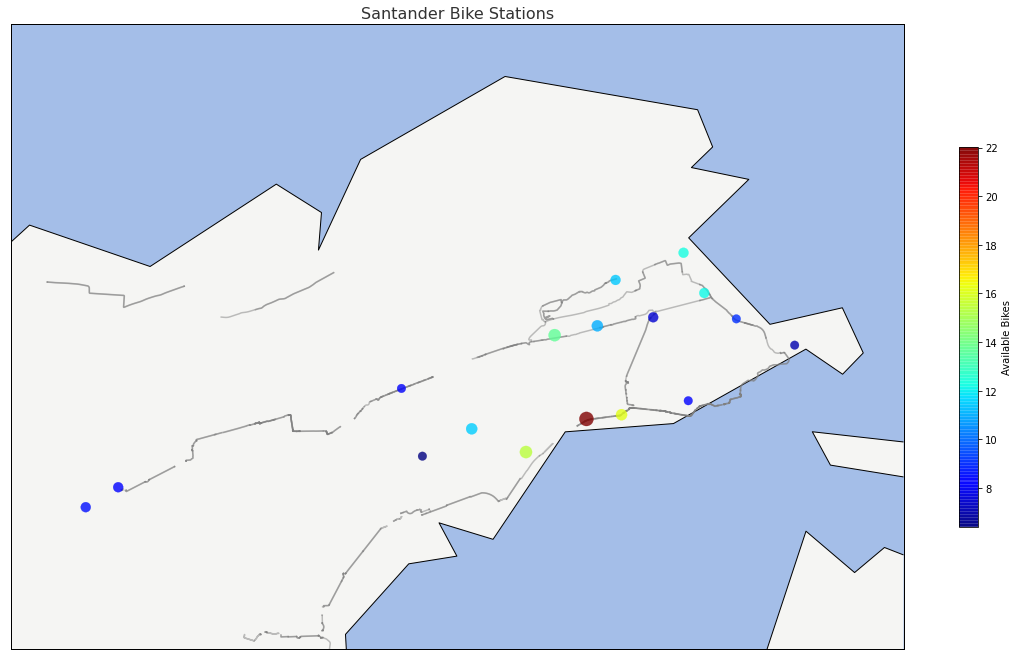

In [ ]:
# define map colors
land_color = '#f5f5f3'
water_color = '#a4bee8'
coastline_color = '#000000'
border_color = '#bbbbbb'

map_width = 10 * 1000
map_height = 7 * 1000

# plot the map
fig_width = 20
fig = pyplot.figure(figsize=(20, 20 * map_height / map_width))

ax = fig.add_subplot(111, facecolor='#ffffff')
ax.set_title("Santander Bike Stations", fontsize=16, color='#333333')

lat = 43.47
lon = -3.82

m = basemap.Basemap(projection="tmerc",lon_0=lon, lat_0=lat,width=map_width, height=map_height,resolution='h',area_thresh=0.1)
m.drawmapboundary(fill_color=water_color)
m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawstates(color=border_color)

means = data.groupby("name").mean()

m.scatter(means.lng.values.ravel(), means.lat.values.ravel(),latlon=True,alpha=0.8,s=means["bike_stands"] * 5,
          label="bike stands",c=means["available_bikes"].astype(float),lw=.25,cmap=pyplot.get_cmap("jet"),zorder=3)                

# This should work, but I do not know why it does not
#ax.add_collection(bike_lanes)
for l in bike_lanes:
    m.plot(*l.xy, latlon=True, color="grey", alpha=0.5)

c = pyplot.colorbar(orientation='vertical', shrink=0.5)
c.set_label("Available Bikes")